<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/MVAR_junc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing  necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from subprocess import check_out
from sklearn import preprocessing
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline




In [7]:
df=pd.read_csv('https://gist.githubusercontent.com/ismaelc/8c3f4a505c0ce3ce410429b0379a02b6/raw/0ed96c6f4f7ec0b06809286438f4ecccde9eba04/diabetes.csv')

In [9]:
df.describe()

#import ydata profiling to get a ful report on data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.913386,120.911417,68.474409,19.566929,80.232283,31.764173,0.460567,33.346457,0.344488
std,3.305064,31.786424,20.436203,16.275653,119.686281,8.072185,0.322653,11.768060,0.475670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,26.600000,0.248000,24.000000,0.000000
50%,3.000000,117.000000,71.000000,22.000000,0.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.625000,0.591500,41.000000,1.000000
max,14.000000,198.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [10]:
#check for NaN
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

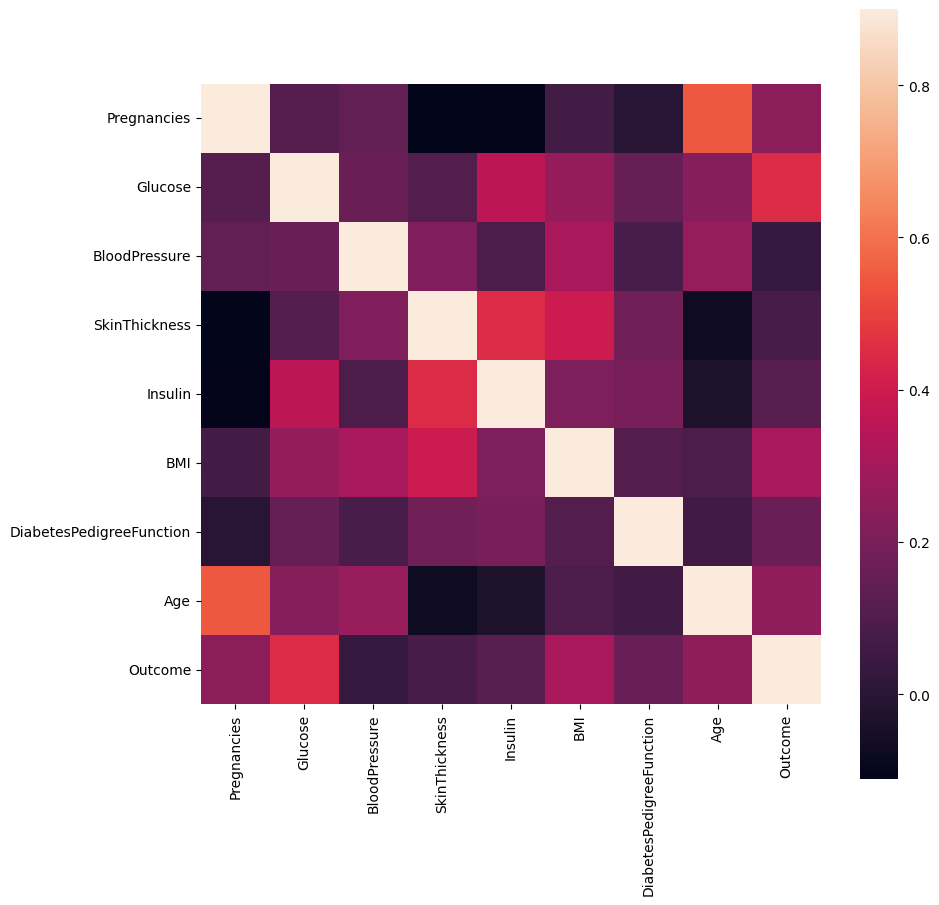

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.115728       0.143699      -0.111433   
Glucose                      0.115728  1.000000       0.164349       0.106852   
BloodPressure                0.143699  0.164349       1.000000       0.215948   
SkinThickness               -0.111433  0.106852       0.215948       1.000000   
Insulin                     -0.104100  0.361279       0.092598       0.447156   
BMI                          0.069356  0.267506       0.310278       0.397966   
DiabetesPedigreeFunction    -0.004067  0.156603       0.082272       0.178071   
Age                          0.547748  0.231824       0.271183      -0.072763   
Outcome                      0.243591  0.448162       0.036518       0.080453   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.104100  0.069356                 -0.004067   
Glucose                   0.361279  0.267

In [13]:
# Understadning correlation among variables

correlation_metrics = df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlation_metrics,vmax=0.9, square=True)
plt.show()
print(correlation_metrics)

In [15]:
# How man have not diabetes?

No_sugar=0
result=df['Outcome']
for i in range(len(result)):
  if result[i]==0:
    No_sugar+=1

print(No_sugar)

333


In [16]:
# How man have not diabetes?
sugar=0
result=df['Outcome']
for i in range(len(result)):
  if result[i]==1:
    sugar+=1

print(sugar)

175


<Axes: xlabel='Outcome', ylabel='count'>

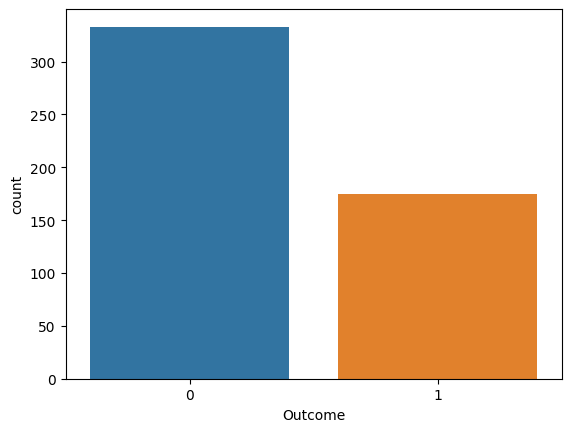

In [17]:
# plot instead
sns.countplot(x=df.Outcome)


In [18]:
#Multivariate analysis
# splitting data

x=df.drop(['Outcome'], axis=1) # drop the target value
y=df['Outcome']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [19]:
# using logistic regression
L = LogisticRegression()
L.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred=L.predict(xtest)

In [28]:
#Confusion Matrix
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[60 13]
 [12 17]]


In [31]:
#Final Accuracy
accuracy=L.score(xtest, ytest)
print(accuracy*100)

75.49019607843137
